In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('..\\Datasets\\data.csv')
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [6]:
X = df.iloc[:,0:3]
y = df.iloc[:,-1]
print(X.shape)
print(y.shape)

(200, 3)
(200,)


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

# 1. Linear Relationship <br>
There should be linear relationship between each input features and target.

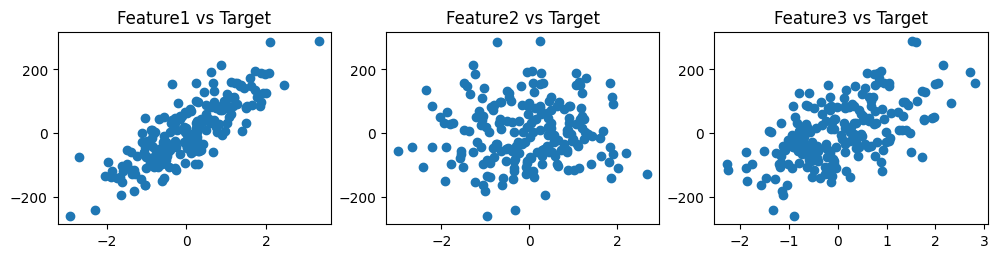

In [9]:
import matplotlib.pyplot as plt
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(12,2.5))

ax1.scatter(df['feature1'], df['target'])
ax1.set_title('Feature1 vs Target')
ax2.scatter(df['feature2'], df['target'])
ax2.set_title('Feature2 vs Target')
ax3.scatter(df['feature3'], df['target'])
ax3.set_title('Feature3 vs Target')
plt.show()

# 2. Multicollinearity <br>
y = β0 + β1 * X1 + β2 * X2 + ..... + βn * Xn      <br>
- In linear regression, our assumption is that target and features are linearly related. <br>
- But when one feature relates to another feature i.e. if multicollinearity exists between features the relation is no more linear.<br>
- Here, β1 represents the change in y when feature X1 is changed assuming X2, X3, ..., Xn are constant. So, when calculating β1, X1 is changed which due to multicollinearity changes X3 too then the realtion is no more linear.

In [10]:
# Method 1
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []
for i in range(X_train.shape[1]):
  vif.append(variance_inflation_factor(X_train,i))

pd.DataFrame({'vif':vif}, index=df.columns[0:3]).T

,feature1,feature2,feature3
vif,1.010326,1.009871,1.01395


VIF for each feature is around 1, so there is no multicollinearity between the features. <br>
If VIF >= 5 for a feature, then that feature is depends on another feature and it must be dropped.

<Axes: >

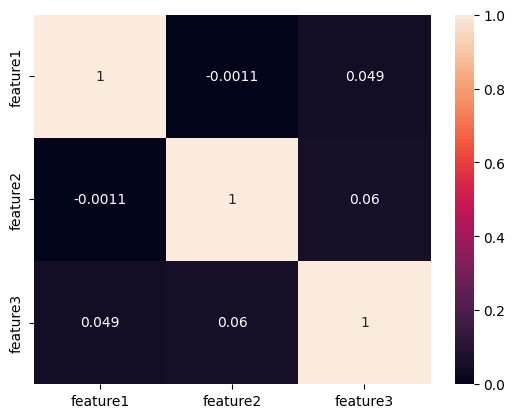

In [11]:
# Method 2
import seaborn as sns
sns.heatmap(df.iloc[:,0:3].corr() , annot=True)

Here we can see correlation between features which is very less.

# 3. Normality of Resiudal
- Another assumption in LR is that the residual is normally distributed.
- This is necessary because for making valid statistical inferences about the reg model like hypothesis testing and confidence interval.

In [12]:
residual = y_test - y_pred

<Axes: xlabel='target', ylabel='Density'>

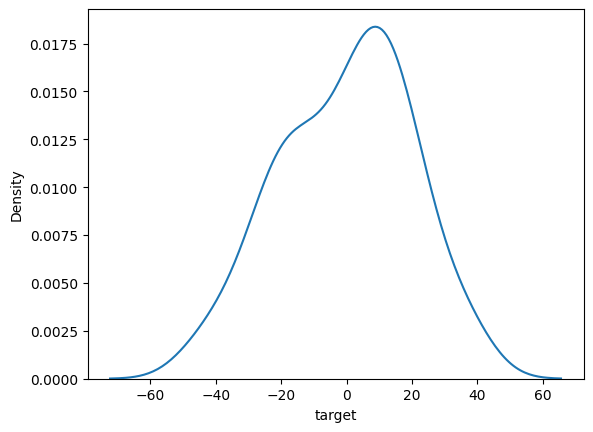

In [13]:
sns.kdeplot(residual)

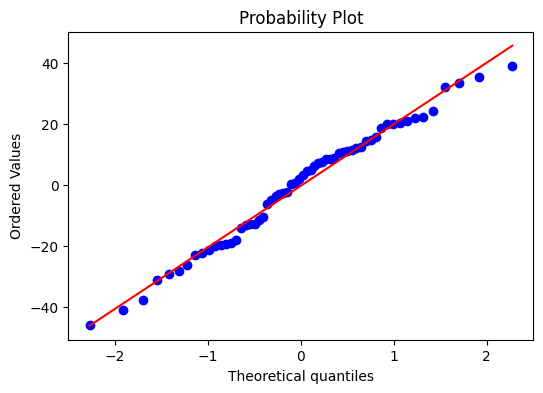

In [14]:
import scipy.stats as stats
fig,ax = plt.subplots(figsize=(6,4))
stats.probplot(residual,plot=ax,fit=True)
plt.show()

# 4. Homoscedasticity
- It means that the spread of the residuals is roughly the same, regardless of whether the predicted values are large or small.

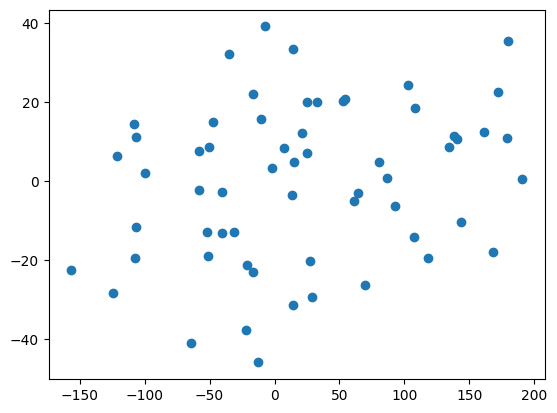

In [15]:
plt.scatter(y_pred,residual)

# 5. No Autocorrelation of Error
- Autocorrelation of residuals refers to the relationship between the residuals (errors) in a regression model, where the residuals from one observation are correlated with residuals from another observation.
- In linear regression, one of the key assumptions is that residuals are independent of each other.

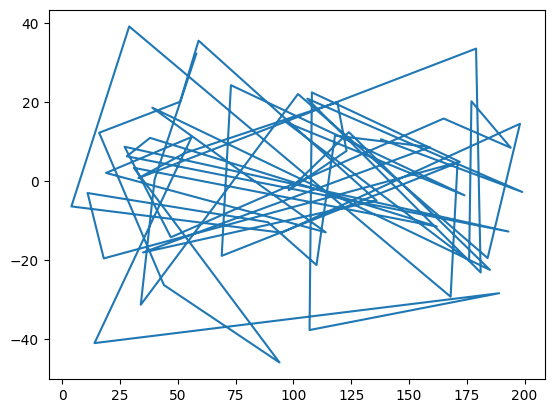

In [16]:
plt.plot(residual)